# Machine Learning: Regression - Predicting Energy Efficiency of Buildings

### We will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings.

In [77]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx', engine='openpyxl')

df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [78]:
# rename columns
column_names = {'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 
               'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 
               'X6': 'Orientation', 'X7': 'Glazing-Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns = column_names)

df.head()




,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing-Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


## Data Exploration


#### check for duplicate entries
#### check for null values 

In [85]:
df.duplicated().sum()

0

In [79]:
df.isnull().sum()


Relative_Compactness           0
Surface_Area                   0
Wall_Area                      0
Roof_Area                      0
Overall_Height                 0
Orientation                    0
Glazing-Area                   0
Glazing_Area_Distribution      0
Heating_Load                   0
Cooling_Load                   0
Unnamed: 10                  768
Unnamed: 11                  768
dtype: int64

In [80]:
df.drop(['Unnamed: 10', 'Unnamed: 11'], inplace = True, axis = 1)

In [81]:
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing-Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

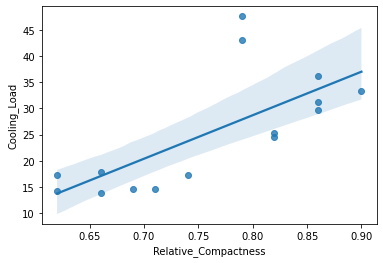

In [82]:
#select a sample of dataset
# We select a sample of the dataset and use the relative compactness column as the predictor(independent variable) and the heating load column the response variable(dependent variable).
simple_liner_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

# regression plot
sns.regplot(x = "Relative_Compactness", y = "Cooling_Load",
           data = simple_liner_reg_df)



### Normalisation 

In [83]:
#Firstly we have to normalise our dataset to a common scale using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns = ['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [84]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing-Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [68]:
#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()

In [69]:
#fit the model to the training dataset
reg =linear_model.fit(x_train, y_train)

In [71]:
reg.score(x_test, y_test)

0.8938550769308062

In [73]:
reg.score(x_train, y_train)

0.9252691483376907

In [72]:
#obtain predictions
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.19171335, 0.57861912, 0.73990043, 0.71445968, 0.75810474,
       0.24871954, 0.16921186, 0.60311106, 0.24501095, 0.54737107,
       0.31823959, 0.65925977, 0.69331771, 0.30343424, 0.19027072,
       0.71785863, 0.57207665, 0.3159481 , 0.26210611, 0.74693205,
       0.69900815, 0.06941108, 0.60925257, 0.3270687 , 0.21248809,
       0.74445789, 0.33479036, 0.18715589, 0.80079078, 0.27003867,
       0.67806128, 0.73420999, 0.14215292, 0.28571674, 0.5633094 ,
       0.8076142 , 0.33505064, 0.1353295 , 0.72354907, 0.24727691,
       0.82414823, 0.15809126, 0.11176667, 0.16578739, 0.117612  ,
       0.15327352, 0.48452124, 0.68989323, 0.75354728, 0.72015012,
       0.10167366, 0.66495022, 0.09850946, 0.25072523, 0.76371047,
       0.76826793, 0.73647596, 0.62801172, 0.15118472, 0.29887678,
       0.19284633, 0.59447275, 0.60356213, 0.76484345, 0.5686777 ,
       0.92641767, 0.68193683, 0.31937257, 0.66950767, 0.23759893,
       0.54397212, 0.25185821, 0.23182538, 0.72232476, 0.28684

### Error metrics

In [42]:
#MAE
# it calculates the sum of the average of the absolute error between the predicted values and the true values.
# does not consider direction.
# The smaller the MAE is, the better the model. 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [43]:
# R-Squared
# r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1
# the higher the value, the better the model 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

In [44]:
# Residual Sum of Squares(RSS)
#this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model.
# The lower the RSS, the better the model’s estimations and vice versa.
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

In [45]:
# Root Mean Square Error(RMSE)
# This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. 
# the RMSE is low, it means that the error made by the model has a small deviation from the true values.
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

## Regularisation

### Ridge Regression

##### It is also known as L2 regularisation. This technique uses a penalty to shrink the magnitude of the coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or collinearity (correlation between prediction variables). It includes the square magnitude of the coefficients to the loss function as the penalty term. 

In [48]:
# Ridge Regression (L2) - Square
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

### Lasso Regression


##### Lasso Regression (or L1 regression) is very similar to Ridge regression, but instead performs feature selection by penalising coefficients with such that some coefficients are shrunk to zero, and so performs feature selection by selecting only a subset of features, leaving only relavant variables that minimize the prediction errors.

In [49]:
# Lasso Regression (L1) - absolute 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [54]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


In [55]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing-Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
